In [11]:
import urllib
import urllib.request   
from bs4 import BeautifulSoup, Comment
import pandas as pd
import numpy as np
from pandas import Series, DataFrame


In [6]:
plain_text=[]
for  i in range(1,200):
    url = 'http://www.ihed.ras.ru/rusbank/plaintext.php?substid='+str(i)+'&type=0'
    hds = {'user-agent':'Mozilla/5.0'}
    request = urllib.request.Request(url,headers=hds)
    response = urllib.request.urlopen(request).read()
    plain_text.append(str(response))


In [7]:
df={}
for table in plain_text:
    li=table.split("\\n")
    value=[]
    material=li[1]
    for k in li:
        if k==li[0] or k==li[1] or k==li[2] or k==li[3]:
            continue
        y=k.split()
        if y[0]=="References:":
            break
        value.append(y)
        df[material]= DataFrame(value)


In [8]:
for key in df:
    if df[key].shape[1]==9:
         df[key].columns=['m','Up','Us','Pressure','R/R0_ratio','density','E-E0','Rem','Reference']
    elif df[key].shape[1]==8:
        df[key].columns=['m','Up','Us','Pressure','R/R0_ratio','density','E-E0','Reference']
        

In [12]:
dataset = []
for key in df:
    x = np.array(df[key]['Up'].astype('float64'))
    y = np.array(df[key]['Us'].astype('float64'))    
    foo = np.polyfit(x, y, 1)
    head=key.split()
    foo = np.array(foo) * float(head[-2])
#     foo = df[key].apply(lambda x: np.polyfit(x['Us'],x['Up'],1), axis=1)
    dataset.append(foo.tolist())


In [13]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
 
def getEuclidean(point1, point2):
    dimension = len(point1)
    dist = 0.0
    for i in range(dimension):
        dist += (point1[i] - point2[i]) ** 2
    return math.sqrt(dist)

def k_means(dataset, k, iteration):
    #initialize centers
    index = random.sample(list(range(len(dataset))), k)
    vectors = []
    for i in index:
        vectors.append(dataset[i])
    #initialize labels
    labels = []
    for i in range(len(dataset)):
        labels.append(-1)
    #iteration kmeans
    while(iteration > 0):
        #initialize group
        C = []
        for i in range(k):
            C.append([])
        for labelIndex, item in enumerate(dataset):
            classIndex = -1
            minDist = 1e6
            for i, point in enumerate(vectors):
                dist = getEuclidean(item, point)
                if(dist < minDist):
                    classIndex = i
                    minDist = dist
            C[classIndex].append(item)
            labels[labelIndex] = classIndex
        for i, cluster in enumerate(C):
            clusterHeart = []
            dimension = len(dataset[0])
            for j in range(dimension):
                clusterHeart.append(0)
            for item in cluster:
                for j, coordinate in enumerate(item):
                    clusterHeart[j] += coordinate / len(cluster)
            vectors[i] = clusterHeart
        iteration -= 1
    return C, labels

In [17]:
C, labels = k_means(dataset, 5, 10)

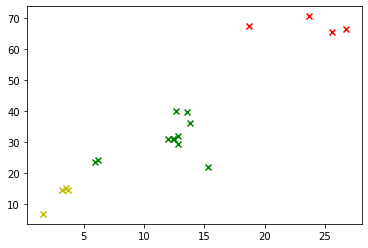

In [18]:
colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
for i in range(len(C)):
    coo_X = []    
    coo_Y = []    
    for j in range(len(C[i])):
        coo_X.append(C[i][j][0])
        coo_Y.append(C[i][j][1])
    plt.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
 
# plt.legend(loc='upper right')
plt.show()
# print(labels)
